Abir Islam, Dr. Joshua Young, ENGR 301, Lab 4

# Part 1:

Problem 1:

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [23]:
df = pd.read_csv("part_conditions.csv")

In [24]:
df.head()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


Problme 2:

In [27]:
df.groupby(["RUL"]).max()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
RUL,,,,,,,,,,,,,,,,,,,,,
0,100,362,0.0077,0.0006,100.0,518.67,644.53,1612.63,1441.49,14.62,...,520.56,2388.56,8293.72,8.5668,0.03,399,2388,100.0,38.65,23.2228
1,100,361,0.0068,0.0006,100.0,518.67,644.53,1614.72,1438.41,14.62,...,520.76,2388.49,8288.26,8.5617,0.03,399,2388,100.0,38.72,23.1961
2,100,360,0.0052,0.0005,100.0,518.67,644.30,1614.93,1436.86,14.62,...,520.61,2388.39,8279.86,8.5836,0.03,398,2388,100.0,38.65,23.2379
3,100,359,0.0062,0.0005,100.0,518.67,644.27,1609.33,1438.51,14.62,...,520.91,2388.37,8274.65,8.5848,0.03,400,2388,100.0,38.74,23.2340
4,100,358,0.0051,0.0005,100.0,518.67,644.31,1612.88,1437.98,14.62,...,520.78,2388.34,8272.65,8.5638,0.03,398,2388,100.0,38.68,23.2617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,69,5,0.0026,0.0002,100.0,518.67,642.37,1582.60,1403.07,14.62,...,522.31,2388.07,8138.93,8.4042,0.03,392,2388,100.0,38.87,23.3195
358,69,4,-0.0001,-0.0003,100.0,518.67,642.00,1586.57,1408.44,14.62,...,521.63,2388.05,8142.92,8.3890,0.03,391,2388,100.0,38.99,23.2744
359,69,3,0.0006,-0.0003,100.0,518.67,642.73,1585.41,1405.22,14.62,...,522.05,2388.06,8136.42,8.3869,0.03,392,2388,100.0,38.82,23.3756


In [28]:
df.groupby(["RUL"]).min()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
RUL,,,,,,,,,,,,,,,,,,,,,
0,1,128,-0.0058,-0.0005,100.0,518.67,643.02,1592.45,1421.41,14.62,...,518.83,2388.12,8102.82,8.4871,0.03,394,2388,100.0,38.19,22.9071
1,1,127,-0.0044,-0.0005,100.0,518.67,643.02,1593.61,1421.12,14.62,...,518.83,2388.11,8101.49,8.4856,0.03,394,2388,100.0,38.16,22.9402
2,1,126,-0.0054,-0.0005,100.0,518.67,643.01,1593.46,1419.91,14.62,...,518.69,2388.10,8103.98,8.4708,0.03,394,2388,100.0,38.24,22.9333
3,1,125,-0.0059,-0.0005,100.0,518.67,642.92,1593.13,1419.63,14.62,...,518.95,2388.08,8103.77,8.4576,0.03,393,2388,100.0,38.23,22.9495
4,1,124,-0.0067,-0.0005,100.0,518.67,642.96,1591.52,1416.81,14.62,...,519.15,2388.05,8104.46,8.4800,0.03,394,2388,100.0,38.23,22.9548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,69,5,0.0026,0.0002,100.0,518.67,642.37,1582.60,1403.07,14.62,...,522.31,2388.07,8138.93,8.4042,0.03,392,2388,100.0,38.87,23.3195
358,69,4,-0.0001,-0.0003,100.0,518.67,642.00,1586.57,1408.44,14.62,...,521.63,2388.05,8142.92,8.3890,0.03,391,2388,100.0,38.99,23.2744
359,69,3,0.0006,-0.0003,100.0,518.67,642.73,1585.41,1405.22,14.62,...,522.05,2388.06,8136.42,8.3869,0.03,392,2388,100.0,38.82,23.3756


In [29]:
df.groupby(["RUL"]).mean()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
RUL,,,,,,,,,,,,,,,,,,,,,
0,50.5,206.31,0.000044,-0.000050,100.0,518.67,643.7218,1602.4990,1430.8732,14.62,...,519.6715,2388.2518,8168.1245,8.524108,0.03,396.60,2388.0,100.0,38.4022,23.053391
1,50.5,205.31,-0.000218,-0.000005,100.0,518.67,643.7147,1602.1845,1429.0198,14.62,...,519.7904,2388.2395,8167.5584,8.525559,0.03,396.25,2388.0,100.0,38.4406,23.064854
2,50.5,204.31,-0.000173,0.000035,100.0,518.67,643.6837,1602.2129,1428.1662,14.62,...,519.7737,2388.2322,8166.9279,8.519881,0.03,396.16,2388.0,100.0,38.4606,23.074655
3,50.5,203.31,0.000053,-0.000035,100.0,518.67,643.6275,1601.8694,1429.0340,14.62,...,519.8661,2388.2252,8166.3012,8.517111,0.03,396.10,2388.0,100.0,38.4497,23.072819
4,50.5,202.31,-0.000176,-0.000008,100.0,518.67,643.6023,1602.6795,1427.5406,14.62,...,519.9442,2388.2188,8165.4204,8.515365,0.03,396.09,2388.0,100.0,38.4769,23.084228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,69.0,5.00,0.002600,0.000200,100.0,518.67,642.3700,1582.6000,1403.0700,14.62,...,522.3100,2388.0700,8138.9300,8.404200,0.03,392.00,2388.0,100.0,38.8700,23.319500
358,69.0,4.00,-0.000100,-0.000300,100.0,518.67,642.0000,1586.5700,1408.4400,14.62,...,521.6300,2388.0500,8142.9200,8.389000,0.03,391.00,2388.0,100.0,38.9900,23.274400
359,69.0,3.00,0.000600,-0.000300,100.0,518.67,642.7300,1585.4100,1405.2200,14.62,...,522.0500,2388.0600,8136.4200,8.386900,0.03,392.00,2388.0,100.0,38.8200,23.375600


The fewest number of cycles was 127
The average number of cycles was 361
The largest number of cycles was 205

Problem 3:

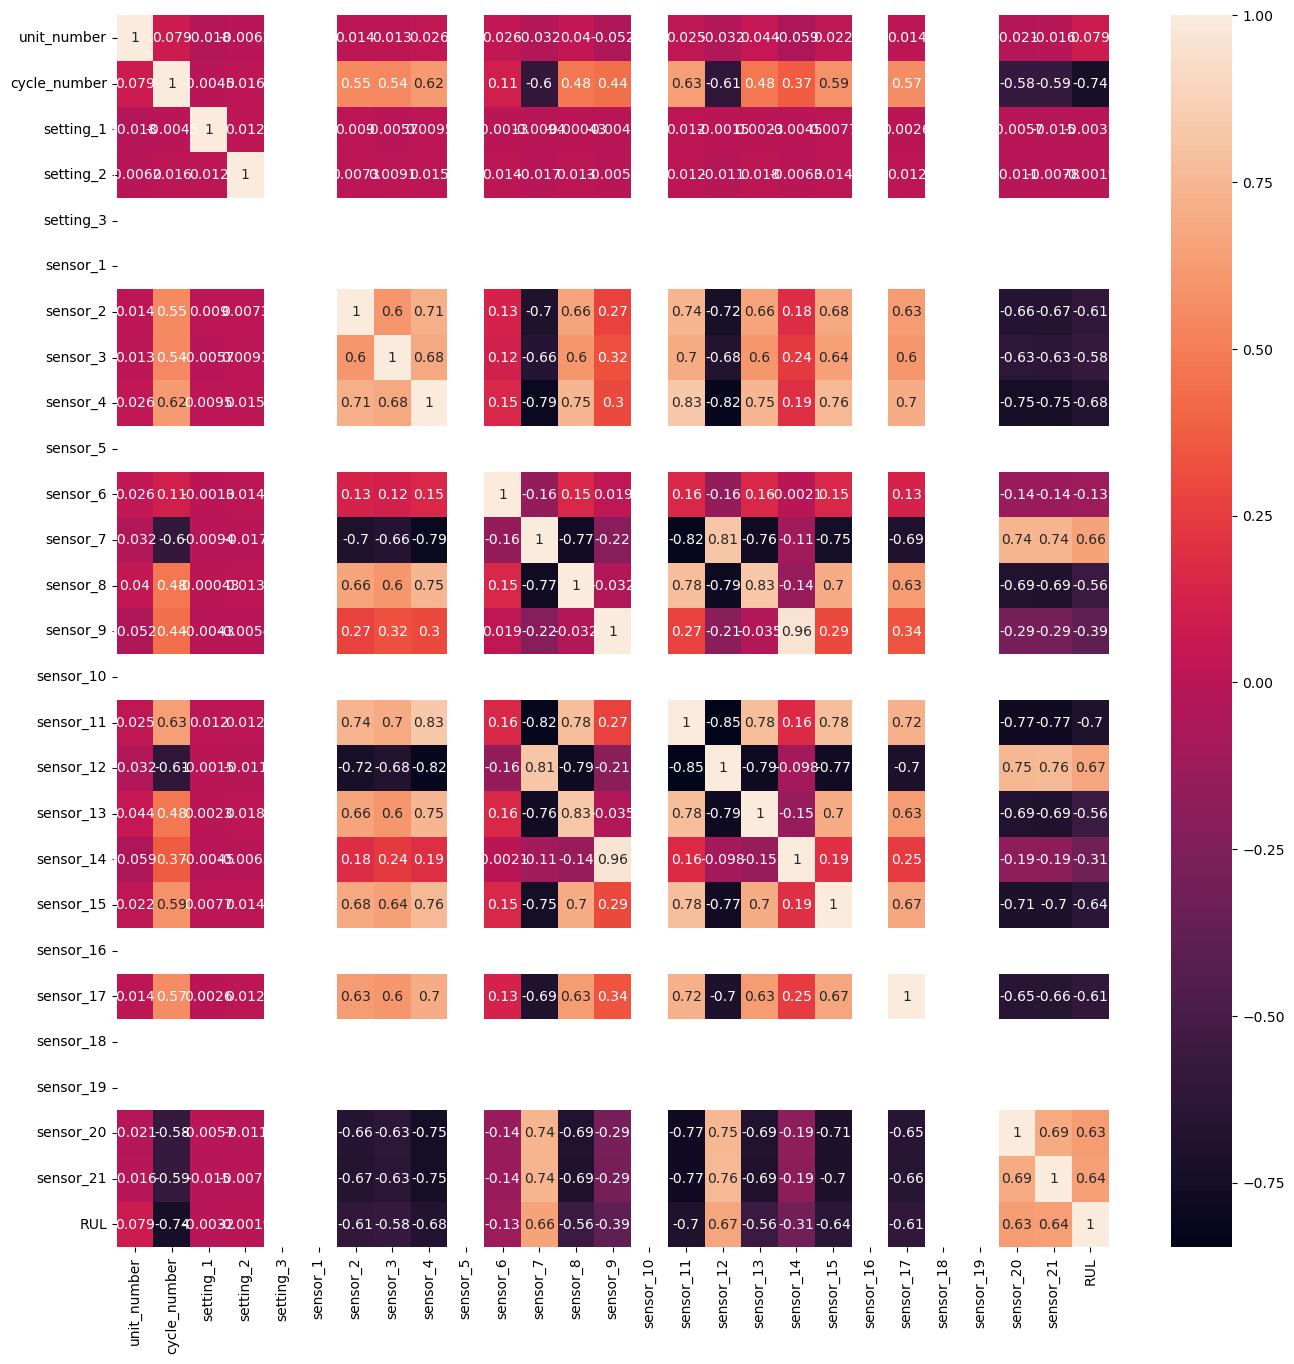

In [18]:
# Part a:

plt.figure(figsize = (16,16))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

There arent many features that correlate with RUL.

In [19]:
# Part b

df1.corr()

,unit_number,cycle_number,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
unit_number,1.000000,0.078753,-0.017895,-0.006197,NaN,NaN,0.014133,0.012621,0.026116,NaN,...,0.044230,-0.059473,0.022486,NaN,0.013513,NaN,NaN,-0.020589,-0.016465,0.078753
cycle_number,0.078753,1.000000,-0.004527,0.016132,NaN,NaN,0.549898,0.543947,0.624577,NaN,...,0.477523,0.370324,0.588676,NaN,0.566995,NaN,NaN,-0.583597,-0.585923,-0.736241
setting_1,-0.017895,-0.004527,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,...,0.002318,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559,-0.003198
setting_2,-0.006197,0.016132,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,...,0.018156,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846,-0.001948
setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sensor_2,0.014133,0.549898,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,...,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050,-0.606484
sensor_3,0.012621,0.543947,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,...,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901,-0.584520
sensor_4,0.026116,0.624577,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,...,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193,-0.678948
sensor_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Its undefined because the standard deviation of those values would lead to 0. 

In [31]:
# Part c

df1 = df.drop(["setting_3", "sensor_1", "sensor_5", "sensor_10", "sensor_16", "sensor_18", "sensor_19"], axis=1)

Problem 4:

In [33]:
# Part a

x = df1.drop(["unit_number", "cycle_number", "RUL"], axis = 1)
y = df["RUL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))

0.5778553707483262


The socre is 0.58

In [38]:
y_pred = model.predict(x_test)
print(r2_score(y_pred, y_test))

0.26935541665410023


The score is 0.27

I believe I got these scores because I didn't properly scale my data to get close enough values.

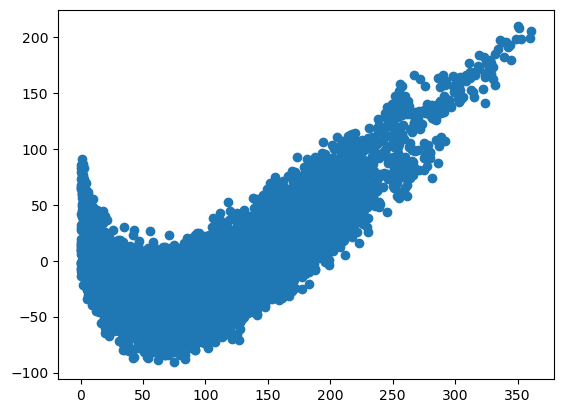

In [40]:
residuals = (y_test - y_pred)
plt.scatter(y_test, residuals)
plt.show()

The values start to increase over an extended period of times after a suddent drop.

#Part c

We are predicting how many cycles it will take for the engine to reach failure, with a majority of the features being utilized. In the real would this would be benficial for companies to see how long their engines will last.

Problem 5:

In [143]:
# Part a

from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression(),n_features_to_select = 1) 
fit = rfe.fit(x_train,y_train)

print(fit.n_features_)
print(fit.ranking_)

x.columns

1
[17 16 10 11  4 14  5 15  2  1  3 13  7  6 12  8  9]


Index(['setting_1', 'setting_2', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_20', 'sensor_21'],
      dtype='object')

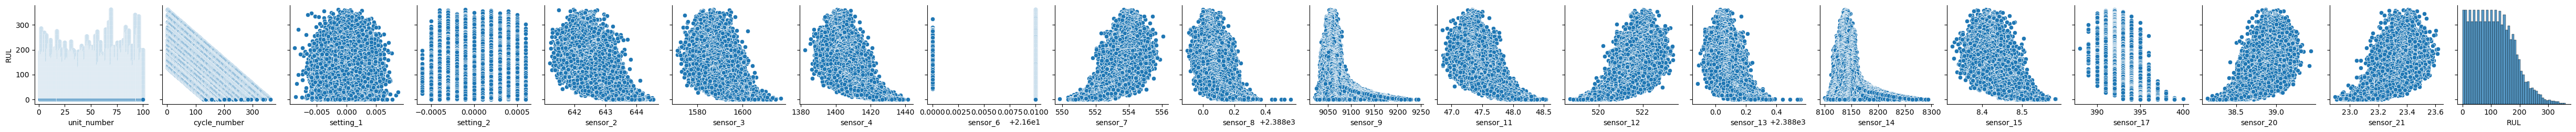

In [54]:
# Part b

sns.pairplot(data = df1, y_vars = ['RUL'])

The 3 worst predictors are setting 2 (no correlation), sensor 6 (no correlation) and setting 1 (no correlation).

# Part 2:

Problem 1:

In [90]:
df2 = pd.read_csv("defects.csv")

In [91]:
df2.shape

(1840, 29)

In [92]:
df2.head()

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,fault_type
0,0,42,50,270900,270944,267,17,44,24220,76,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,1,645,651,2538079,2538108,108,10,30,11397,84,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,2,829,835,1553913,1553931,71,8,19,7972,99,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,3,853,860,369370,369415,176,13,45,18996,99,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,4,1289,1306,498078,498335,2409,60,260,246930,37,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [93]:
df2.corr()

,Unnamed: 0,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
Unnamed: 0,1.000000,0.242491,0.223910,0.002849,0.002836,-0.221203,-0.176508,-0.093525,-0.247913,0.277874,...,-0.184921,0.193708,0.055161,-0.079657,-0.264492,-0.155255,-0.285198,-0.097500,0.072216,-0.172646
X_Minimum,0.242491,1.000000,0.987949,0.037425,0.037410,-0.308070,-0.259161,-0.119236,-0.340726,0.242040,...,-0.361891,0.160055,0.368794,0.145272,-0.432740,-0.441410,-0.331928,0.179774,-0.030569,-0.360819
X_Maximum,0.223910,0.987949,1.000000,0.047673,0.047660,-0.225938,-0.186378,-0.090750,-0.248178,0.172855,...,-0.213382,0.154985,0.271637,0.096819,-0.335362,-0.326095,-0.270607,0.115154,-0.037866,-0.291933
Y_Minimum,0.002849,0.037425,0.047673,1.000000,1.000000,0.018099,0.024079,0.024593,0.007552,-0.066740,...,0.054201,0.066864,-0.033290,-0.062255,0.045043,0.069182,-0.007668,-0.084845,-0.091842,0.027025
Y_Maximum,0.002836,0.037410,0.047660,1.000000,1.000000,0.018274,0.024278,0.024827,0.007693,-0.066771,...,0.054221,0.066830,-0.033296,-0.062245,0.045085,0.069208,-0.007607,-0.084827,-0.091855,0.027052
Pixels_Areas,-0.221203,-0.308070,-0.225938,0.018099,0.018274,1.000000,0.966497,0.829605,0.978686,-0.492662,...,0.582314,-0.293721,-0.458004,-0.105226,0.646371,0.598486,0.576896,-0.135962,-0.043276,0.418377
X_Perimeter,-0.176508,-0.259161,-0.186378,0.024079,0.024278,0.966497,1.000000,0.914461,0.912023,-0.395443,...,0.511334,-0.290863,-0.406260,-0.075577,0.558520,0.519928,0.521292,-0.100535,-0.032922,0.375961
Y_Perimeter,-0.093525,-0.119236,-0.090750,0.024593,0.024827,0.829605,0.914461,1.000000,0.706954,-0.210911,...,0.205817,-0.193439,-0.133268,0.014864,0.291198,0.225765,0.343172,0.031959,-0.047900,0.188502
Sum_of_Luminosity,-0.247913,-0.340726,-0.248178,0.007552,0.007693,0.978686,0.912023,0.706954,1.000000,-0.536972,...,0.653431,-0.327324,-0.525285,-0.116543,0.709701,0.664578,0.618283,-0.157485,-0.013416,0.460644
Minimum_of_Luminosity,0.277874,0.242040,0.172855,-0.066740,-0.066771,-0.492662,-0.395443,-0.210911,-0.536972,1.000000,...,-0.483421,0.249447,0.316168,0.029957,-0.676454,-0.565178,-0.585470,0.056351,0.667495,-0.510823


Problem 2:

(array([152., 180.,   0., 376.,   0.,  68.,  51.,   0., 385., 628.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

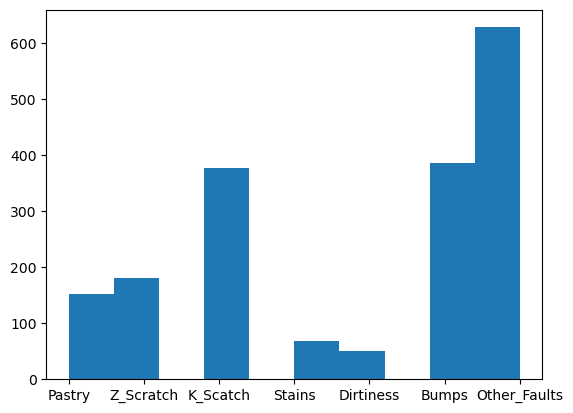

In [94]:
plt.hist(df2["fault_type"])

The distribution is not balanced properly. There is a vast difference between each of the columns.

Problem 3:

In [95]:
# Part a

x1 = df2.drop(["Unnamed: 0", "fault_type"], axis = 1)
y1 = df2["fault_type"]

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled1 = scaler.fit_transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

from sklearn.linear_model import LinearRegression
model1 = LogisticRegression()
model1.fit(x_train_scaled1, y_train1)
y_pred = model1.predict(x_test_scaled1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
# Part b

cm = metrics.confusion_matrix(y_test1, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test1, y_pred))

[[ 63   0   2  49   4   0   1]
 [  0   7   0   7   1   0   0]
 [  0   0 111   4   0   0   1]
 [ 29   7   6 125   7   4   6]
 [  5   1   0  14  26   1   0]
 [  0   0   0   1   0  20   0]
 [  0   0   0   5   0   0  45]]
Accuracy: 0.7192028985507246


This means that about 72% of the values were predicted properly. Row 4 is most improperly classified.

In [113]:
# Part c

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
x_train2, x_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size = 0.3)

x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

model2 = LogisticRegression(max_iter = 200)
model2.fit(x_train_scaled2, y_train2)

y_pred2 = model2.predict(x_test_scaled2)
cm = metrics.confusion_matrix(y_test2, y_pred2)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))

[[ 63   1   1  53   3   0   2]
 [  0  10   0   6   1   0   0]
 [  1   0  96   3   0   1   0]
 [ 28   3   5 132  12   3   7]
 [  6   0   0  13  25   1   1]
 [  0   0   0   0   0  16   0]
 [  1   0   2   3   0   0  53]]
Accuracy: 0.7155797101449275


The accuracy is 72%.

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
x_train2, x_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size = 0.3)

x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

model2 = LogisticRegression(max_iter = 5000)
model2.fit(x_train_scaled2, y_train2)

y_pred2 = model2.predict(x_test_scaled2)

cm = metrics.confusion_matrix(y_test2, y_pred2)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))

[[ 64   0   0  48   3   1   3]
 [  1  10   0   6   1   0   0]
 [  2   0  99   9   1   1   0]
 [ 30   2   6 131  12   0   6]
 [  4   2   0  11  28   0   2]
 [  0   0   0   3   0  14   1]
 [  0   0   1   6   1   0  43]]
Accuracy: 0.7047101449275363


The accuracy is 74%

Problem 4:

In [78]:
# Part a

x3 = df2.drop(["Unnamed: 0", "fault_type"], axis = 1)
y3 = df2["fault_type"]

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.3)

scaler = MinMaxScaler()
x_train_scaled3 = scaler.fit_transform(x_train3)
x_test_scaled3 = scaler.transform(x_test3)

from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()
model3.fit(x_train_scaled3, y_train3)

y_pred3 = model3.predict(x_test_scaled3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# Part b

cm = metrics.confusion_matrix(y_test3, y_pred3)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test3, y_pred3))

[[ 65   0   0  44   6   4   4]
 [  1   5   0  10   2   0   0]
 [  0   0 101   6   0   2   0]
 [ 41   0   4 126   9   2  10]
 [  4   0   0  15  19   1   1]
 [  1   0   0   2   0  18   0]
 [  4   0   0   7   0   0  38]]
Accuracy: 0.6739130434782609


The accuracy came to 67% which is low. The standard scaler is better than the minmax scaler in terms of accuarcy

Problem 5:

In [133]:
model3 = LogisticRegression(max_iter = 200)
model3.fit(x_train_scaled2, y_train2)

y_pred3 = model3.predict(x_test_scaled2)

from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred3))

Accuracy: 0.730072463768116


In [134]:
x3 = df2.drop(["fault_type","Unnamed: 0"], axis = 1)
y3 = df2["fault_type"]

x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.3)

scaler = MinMaxScaler()
x_train_scaled3 = scaler.fit_transform(x_train3)
x_test_scaled3 = scaler.transform(x_test3)

model3 = LogisticRegression(max_iter = 200)
model3.fit(x_train_scaled2, y_train2)

y_pred3 = model3.predict(x_test_scaled2)

from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred3))

Accuracy: 0.730072463768116


In [136]:
model4 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 0.1)
model4.fit(x_train_scaled3, y_train3)

y_pred4 = model4.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred4)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test3, y_pred4))

[[ 68   0   1  51   0   0   1]
 [  0   0   0  14   0   0   0]
 [  1   0  81  19   0   0   0]
 [ 28   0  10 137   0   0   8]
 [  7   0   0  43   3   0   4]
 [  0   0   0   9   0   7   0]
 [  2   0   2   7   0   0  49]]
Accuracy: 0.625


In [137]:
model5 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 1) 
model5.fit(x_train_scaled3, y_train3)

y_pred5 = model5.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred5)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test3, y_pred5))

[[ 74   0   1  42   2   1   1]
 [  0   4   0   7   3   0   0]
 [  1   0  88   8   1   3   0]
 [ 30   0  10 129   4   2   8]
 [  8   2   0  27  16   0   4]
 [  0   0   0   1   0  15   0]
 [  3   0   2   6   0   0  49]]
Accuracy: 0.6793478260869565


In [138]:
model6 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10) 
model6.fit(x_train_scaled3, y_train3)

y_pred6 = model6.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred6)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test3, y_pred6))

[[ 75   0   1  41   3   0   1]
 [  0   6   0   6   2   0   0]
 [  0   0  95   5   1   0   0]
 [ 34   1  10 124   4   2   8]
 [  6   3   0  19  26   0   3]
 [  0   0   0   0   0  16   0]
 [  3   0   2   6   0   0  49]]
Accuracy: 0.7083333333333334


In [139]:
model7 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 100) 
model7.fit(x_train_scaled3, y_train3)

y_pred7 = model7.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred7)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test3, y_pred7))

[[ 75   0   1  41   3   0   1]
 [  0   6   0   6   2   0   0]
 [  0   0  94   5   2   0   0]
 [ 34   1   9 123   7   2   7]
 [  8   2   0  16  29   0   2]
 [  0   0   0   0   0  16   0]
 [  2   0   2   6   0   0  50]]
Accuracy: 0.7119565217391305


In [140]:
model8 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 1000) 
model8.fit(x_train_scaled3, y_train3)

y_pred8 = model8.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred8)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test3, y_pred8))

[[ 72   0   1  43   4   0   1]
 [  0   6   0   6   2   0   0]
 [  1   0  95   4   1   0   0]
 [ 32   1   3 129   9   2   7]
 [  8   2   0  14  31   0   2]
 [  0   0   0   0   0  16   0]
 [  2   0   2   6   0   0  50]]
Accuracy: 0.7228260869565217


In [142]:
model9 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10000) 
model9.fit(x_train_scaled3, y_train3)

y_pred9 = model9.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred9)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred9))

[[ 73   0   0  43   4   0   1]
 [  0   6   0   6   2   0   0]
 [  1   0  95   4   1   0   0]
 [ 33   1   4 127  10   1   7]
 [  8   2   0  15  30   0   2]
 [  0   0   0   0   0  16   0]
 [  2   2   2   5   0   0  49]]
Accuracy: 0.717391304347826


As C increases the accuracy decreases.